##### Course name: "***Curso de Análisis Estadístico y Ciencia de Datos Aplicada a Datos Ambientales usando Python 2025***"
##### Supervised by: Dr. Gilberto Cardoso

##### Final project "***Integrative assessment of environmental variables and sediment nutrients along a coastal-offshore transect***"
##### Submitted by: Judith C. Posadas Hernández

##### Date: September 10, 2025



#### **Introduction** 

Coastal regions are vital for maintaining biodiversity, regulating biogeochemical cycles, and delivering essential ecological services, while also supporting key economic and social activities such as fisheries, tourism, and transportation. In Mexico, coastal ecosystems are highly diverse, extending across the Pacific, Gulf of Mexico, and Caribbean regions, each with distinct environmental characteristics and ecological importance. The Caribbean coast is particularly significant due to its coral reefs, mangroves, and seagrass beds, representing a critical ecological, economic, and social hotspot. The Mexican Caribbean borders the state of Quintana Roo on the eastern coast of the Yucatán Peninsula. The region experiences a warm, subhumid climate, with average annual temperatures ranging from 23°C to 28°C and rainfall between 700 mm and 1500 mm. February through April are typically the driest months, while the heaviest rains occur from May to October. From November to February, the area is influenced by “northerlies,” cold fronts characterized by strong northerly winds (Gómez et al., 2022; Pérez-Gómez et al., 2020).

The Caribbean Sea is a globally significant biogeographic region and ranks among the top five marine biodiversity hotspots worldwide. It hosts roughly 500 fish species, contains 12% of the world’s coral reefs, and features the Mesoamerican Reef System, the second-largest barrier reef in the world. The Mexican Caribbean encompasses 900 km of coastline, including both insular and continental zones, supporting a variety of interacting ecosystems. These coastal environments provide multiple ecosystem services, including provisioning, supporting, regulating, and cultural services. Despite the presence of 15 Natural Protected Areas and nine Priority Marine Regions, many ecosystems have been declining over the past decades. Human pressures, such as rapid tourism-driven coastal development originating in Cancún during the early 1970s and gradually expanding southward, combined with increasing storm and hurricane intensity, have placed additional stress on these ecosystems. Furthermore, since late 2014, large influxes of pelagic Sargassum spp. have further impacted coastal habitats and the regional tourism economy (Guimarais et al., 2021).

To achieve a comprehensive understanding of these coastal ecosystems, it is essential to analyze water and sediment physicochemical properties alongside environmental variables. Such analyses enable the examination of spatial and depth-related variability, the assessment of nutrient and carbon distributions, and the identification of relationships among environmental factors. Utilizing Python with a synthetic dataset (simulated data) allows for exploratory statistics, multivariate analyses, and visualizations, providing a robust framework to reveal patterns and generate insights that can inform both ecological research and sustainable coastal management.



#### **Aim**
The aim of this project is to analyze and visualize water, sediment, and environmental data from a coastal-offshore transect to investigate spatial and depth-related patterns in nutrient (carbon, nitrogen, and phosphorus) distributions, examine relationships among environmental variables, and apply statistical and multivariate analyses using Python with a synthetic dataset (simulated data).

In [66]:
### Import packages for data analysis and visualization

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [67]:
### Import data from CSV files
# Define a FUNCTION that will allow me to import a CSV file and load it into a pandas DataFrame
def import_csv(file):
    # Read the csv file into a DataFrame: df con el paquete pandas
    import pandas as pd 
    return pd.read_csv(file)

#Use the name of the PREdefined FUNCTION and the name of the .csv file
import_csv("C:/Projects/modelab_jp/Final_project_jp/raw_data/water.csv")
import_csv("C:/Projects/modelab_jp/Final_project_jp/raw_data/sediment.csv")
import_csv("C:/Projects/modelab_jp/Final_project_jp/raw_data/environment.csv")

#Define a VARIABLE to be able to manipulate the DataFrame (not just display it)
water = import_csv("C:/Projects/modelab_jp/Final_project_jp/raw_data/water.csv")
sediment = import_csv("C:/Projects/modelab_jp/Final_project_jp/raw_data/sediment.csv")
environment = import_csv("C:/Projects/modelab_jp/Final_project_jp/raw_data/environment.csv")

In [68]:
#Save these tables as data_FinalProject.xlsx files
with pd.ExcelWriter("C:\Projects\modelab_jp\data_FinalProject.xlsx") as writer:
    water.to_excel(writer, sheet_name="water")
    sediment.to_excel(writer, sheet_name="sediment")
    environment.to_excel(writer, sheet_name="environment")

In [69]:
water

,Sitio,Distancia_m,Muestra,P_total_mg_L,N_total_mg_L,C_total_mg_L,DQO_mg_L,Solidos_totales_mg_L,pH
0,1,0,Agua,0.097,2.32,3.47,15.2,30.7,7.94
1,2,10,Agua,0.033,0.98,4.53,5.2,28.9,8.26
2,3,20,Agua,0.055,0.79,4.53,12.7,35.4,8.26
3,4,30,Agua,0.037,1.48,4.14,8.4,35.0,8.15
4,5,40,Agua,0.036,2.47,2.36,14.7,30.1,8.04
5,6,50,Agua,0.013,0.98,5.34,7.6,33.3,8.04
6,7,60,Agua,0.065,1.84,3.28,15.4,34.5,8.19
7,8,70,Agua,0.055,2.02,2.75,10.8,32.4,8.26
8,9,80,Agua,0.015,0.98,2.16,19.1,32.2,8.25
9,10,90,Agua,0.035,1.96,4.36,7.1,29.9,8.21


In [70]:
sediment


,Sitio,Tipo_sedimento,Distancia_m,Humedad_%,pH,CE_uS,Redfield_ratio,C_total_mg_g,N_total_mg_g,P_total_mg_g
0,1,superficial,0,35.0,7.99,683.1,15.1,4.09,0.58,0.041
1,1,50cm,0,58.0,7.61,1242.8,14.2,3.37,0.38,0.026
2,2,superficial,10,49.3,7.73,551.6,18.6,2.49,0.31,0.027
3,2,50cm,10,43.9,7.79,1864.0,14.9,1.69,0.20,0.019
4,3,superficial,20,26.2,7.86,888.2,14.2,2.43,0.25,0.022
5,3,50cm,20,26.2,8.13,1493.8,16.3,2.48,0.32,0.026
6,4,superficial,30,22.3,7.66,967.6,13.1,3.69,0.45,0.032
7,4,50cm,30,54.6,7.91,1280.1,18.4,3.41,0.37,0.026
8,5,superficial,40,44.0,7.97,1320.1,12.6,4.16,0.54,0.054
9,5,50cm,40,48.3,7.54,777.3,19.9,2.92,0.40,0.032


In [71]:
environment

,Sitio,Profundidad_m,Temp_potencial_C,Salinidad_PSU,Velocidad_corriente_ms,Direccion_corriente_deg,Clorofila_a_mg_m3,Nitrato_mmol_m3,Oxigeno_mmol_m3,Fosfato_mmol_m3,Silicato_mmol_m3,Temp_atmosferica_C,Humedad_relativa_%,Viento_ms,Precipitacion_mm,Presion_hPa,Radiacion_Wm2
0,1,1.0,28.28,36.10,0.21,286.1,0.76,0.37,193.1,0.171,1.84,26.2,71.3,3.6,5.5,1008.6,223.7
1,2,3.1,27.17,36.38,0.19,180.9,0.77,0.45,219.3,0.172,1.01,26.2,83.3,1.5,7.1,1012.6,221.0
2,3,5.2,27.32,36.30,0.07,207.7,0.75,0.87,159.8,0.180,1.06,30.9,83.5,1.2,6.6,1005.1,176.0
3,4,7.3,28.80,35.45,0.14,177.3,0.42,0.39,186.3,0.187,0.64,28.2,85.9,6.8,2.8,1006.2,215.1
4,5,9.4,28.21,36.42,0.12,70.3,0.21,0.25,211.4,0.127,1.37,26.8,88.2,6.0,9.5,1005.5,209.8
5,6,11.6,27.02,35.47,0.11,260.1,0.76,0.60,201.9,0.125,0.55,29.1,94.4,5.2,7.4,1005.4,242.4
6,7,13.7,27.20,35.65,0.29,101.1,0.46,0.94,198.8,0.170,1.20,30.6,82.9,3.5,5.5,1013.6,245.3
7,8,15.8,28.33,36.49,0.15,8.8,0.78,0.73,199.2,0.147,1.31,27.3,78.1,2.0,6.1,1012.0,156.8
8,9,17.9,27.01,36.30,0.27,232.4,0.78,0.61,175.2,0.155,0.93,29.7,89.9,1.9,4.2,1009.7,206.2
9,10,20.0,27.32,36.70,0.21,63.8,0.71,0.19,170.6,0.169,1.39,26.5,76.8,2.5,2.5,1006.0,243.9


#### Exploring DataFrame

In [72]:
water.columns #Displays column names

Index(['Sitio', 'Distancia_m', 'Muestra', 'P_total_mg_L', 'N_total_mg_L',
       'C_total_mg_L', 'DQO_mg_L', 'Solidos_totales_mg_L', 'pH'],
      dtype='object')

In [73]:
sediment.columns

Index(['Sitio', 'Tipo_sedimento', 'Distancia_m', 'Humedad_%', 'pH', 'CE_uS',
       'Redfield_ratio', 'C_total_mg_g', 'N_total_mg_g', 'P_total_mg_g'],
      dtype='object')

In [74]:
environment.columns

Index(['Sitio', 'Profundidad_m', 'Temp_potencial_C', 'Salinidad_PSU',
       'Velocidad_corriente_ms', 'Direccion_corriente_deg',
       'Clorofila_a_mg_m3', 'Nitrato_mmol_m3', 'Oxigeno_mmol_m3',
       'Fosfato_mmol_m3', 'Silicato_mmol_m3', 'Temp_atmosferica_C',
       'Humedad_relativa_%', 'Viento_ms', 'Precipitacion_mm', 'Presion_hPa',
       'Radiacion_Wm2'],
      dtype='object')

In [ ]:
water.info() #Displays general information
sediment.info()
environment.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sitio                 10 non-null     int64  
 1   Distancia_m           10 non-null     int64  
 2   Muestra               10 non-null     object 
 3   P_total_mg_L          10 non-null     float64
 4   N_total_mg_L          10 non-null     float64
 5   C_total_mg_L          10 non-null     float64
 6   DQO_mg_L              10 non-null     float64
 7   Solidos_totales_mg_L  10 non-null     float64
 8   pH                    10 non-null     float64
dtypes: float64(6), int64(2), object(1)
memory usage: 852.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sitio           20 non-null     int64  
 1   Tipo_sedimento  20 non-null 

In [76]:
display(water.describe()) #Displays basic descriptive statistics
display(sediment.describe())
display(environment.describe())

,Sitio,Distancia_m,P_total_mg_L,N_total_mg_L,C_total_mg_L,DQO_mg_L,Solidos_totales_mg_L,pH
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,45.000000,0.044100,1.582000,3.692000,11.620000,32.240000,8.160000
std,3.02765,30.276504,0.024964,0.619978,1.053827,4.503776,2.295987,0.114891
min,1.00000,0.000000,0.013000,0.790000,2.160000,5.200000,28.900000,7.940000
25%,3.25000,22.500000,0.033500,0.980000,2.882500,7.800000,30.250000,8.067500
50%,5.50000,45.000000,0.036500,1.660000,3.805000,11.750000,32.300000,8.200000
75%,7.75000,67.500000,0.055000,2.005000,4.487500,15.075000,34.200000,8.257500
max,10.00000,90.000000,0.097000,2.470000,5.340000,19.100000,35.400000,8.260000


,Sitio,Distancia_m,Humedad_%,pH,CE_uS,Redfield_ratio,C_total_mg_g,N_total_mg_g,P_total_mg_g
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,5.500000,45.000000,38.295000,7.863500,1234.960000,15.685000,2.961500,0.353500,0.028600
std,2.946898,29.468985,12.308041,0.233222,496.184551,2.518411,0.805627,0.111321,0.009735
min,1.000000,0.000000,20.800000,7.540000,551.600000,12.000000,1.580000,0.160000,0.014000
25%,3.000000,20.000000,27.300000,7.655000,789.825000,13.475000,2.467500,0.295000,0.025000
50%,5.500000,45.000000,36.150000,7.855000,1261.450000,15.000000,3.025000,0.355000,0.027000
75%,8.000000,70.000000,48.550000,8.005000,1707.575000,18.200000,3.652500,0.407500,0.032000
max,10.000000,90.000000,58.800000,8.270000,1954.400000,19.900000,4.160000,0.580000,0.054000


,Sitio,Profundidad_m,Temp_potencial_C,Salinidad_PSU,Velocidad_corriente_ms,Direccion_corriente_deg,Clorofila_a_mg_m3,Nitrato_mmol_m3,Oxigeno_mmol_m3,Fosfato_mmol_m3,Silicato_mmol_m3,Temp_atmosferica_C,Humedad_relativa_%,Viento_ms,Precipitacion_mm,Presion_hPa,Radiacion_Wm2
count,10.00000,10.000000,10.00000,10.000000,10.000000,10.000000,10.0000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000
mean,5.50000,10.500000,27.66600,36.126000,0.176000,158.850000,0.6400,0.540000,191.560000,0.160300,1.130000,28.150000,83.430000,3.420000,5.720000,1008.47000,214.020000
std,3.02765,6.403992,0.66249,0.445725,0.070742,92.970918,0.2021,0.253772,18.638503,0.021297,0.380409,1.817966,6.756569,1.974166,2.140509,3.30355,29.095391
min,1.00000,1.000000,27.01000,35.450000,0.070000,8.800000,0.2100,0.190000,159.800000,0.125000,0.550000,26.200000,71.300000,1.200000,2.500000,1005.10000,156.800000
25%,3.25000,5.725000,27.17750,35.762500,0.125000,78.000000,0.5225,0.375000,177.975000,0.149000,0.950000,26.575000,79.300000,1.925000,4.525000,1005.62500,207.100000
50%,5.50000,10.500000,27.32000,36.300000,0.170000,179.100000,0.7550,0.525000,195.950000,0.169500,1.130000,27.750000,83.400000,3.000000,5.800000,1007.40000,218.050000
75%,7.75000,15.275000,28.26250,36.410000,0.210000,226.225000,0.7675,0.700000,201.225000,0.171750,1.355000,29.550000,87.625000,4.800000,6.975000,1011.42500,237.725000
max,10.00000,20.000000,28.80000,36.700000,0.290000,286.100000,0.7800,0.940000,219.300000,0.187000,1.840000,30.900000,94.400000,6.800000,9.500000,1013.60000,245.300000


In [77]:
water.shape #Displays the number of rows and columns
sediment.shape
environment.shape


(10, 17)

In [78]:
#### Check for missing values in the DataFrame
water.info()
sediment.info()
environment.info()      

#To confirm that there are no missing values
water.isnull().sum()
sediment.isnull().sum()
environment.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sitio                 10 non-null     int64  
 1   Distancia_m           10 non-null     int64  
 2   Muestra               10 non-null     object 
 3   P_total_mg_L          10 non-null     float64
 4   N_total_mg_L          10 non-null     float64
 5   C_total_mg_L          10 non-null     float64
 6   DQO_mg_L              10 non-null     float64
 7   Solidos_totales_mg_L  10 non-null     float64
 8   pH                    10 non-null     float64
dtypes: float64(6), int64(2), object(1)
memory usage: 852.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sitio           20 non-null     int64  
 1   Tipo_sedimento  20 non-null 

Sitio                      0
Profundidad_m              0
Temp_potencial_C           0
Salinidad_PSU              0
Velocidad_corriente_ms     0
Direccion_corriente_deg    0
Clorofila_a_mg_m3          0
Nitrato_mmol_m3            0
Oxigeno_mmol_m3            0
Fosfato_mmol_m3            0
Silicato_mmol_m3           0
Temp_atmosferica_C         0
Humedad_relativa_%         0
Viento_ms                  0
Precipitacion_mm           0
Presion_hPa                0
Radiacion_Wm2              0
dtype: int64

### Exploring data with plots

##### Normality Test: Shapiro-Wilk Test

In [79]:
#Normality to water dataset: 
water.columns

Index(['Sitio', 'Distancia_m', 'Muestra', 'P_total_mg_L', 'N_total_mg_L',
       'C_total_mg_L', 'DQO_mg_L', 'Solidos_totales_mg_L', 'pH'],
      dtype='object')

In [80]:
from scipy.stats import shapiro

# Select only numeric variables
variables = ['P_total_mg_L', 'N_total_mg_L', 'C_total_mg_L',
             'DQO_mg_L', 'Solidos_totales_mg_L', 'pH']

# Dictionary to save results
results = {}

#Loop over each variable
for var in variables:
    stat, p = shapiro(water[var])
    results[var] = {"W-statistic": stat, "p-value": p}
    
    print(f"Variable: {var}")
    print(f"  Estadístico= {stat:.5f}, p-valor= {p:.5f}")
    
    if p > 0.05:
        print("  ✅ La distribución es normal (no se rechaza H0)\n")
    else:
        print("  ❌ La distribución NO es normal (se rechaza H0)\n")

Variable: P_total_mg_L
  Estadístico= 0.92045, p-valor= 0.36075
  ✅ La distribución es normal (no se rechaza H0)

Variable: N_total_mg_L
  Estadístico= 0.89782, p-valor= 0.20731
  ✅ La distribución es normal (no se rechaza H0)

Variable: C_total_mg_L
  Estadístico= 0.94868, p-valor= 0.65294
  ✅ La distribución es normal (no se rechaza H0)

Variable: DQO_mg_L
  Estadístico= 0.95212, p-valor= 0.69360
  ✅ La distribución es normal (no se rechaza H0)

Variable: Solidos_totales_mg_L
  Estadístico= 0.93977, p-valor= 0.55044
  ✅ La distribución es normal (no se rechaza H0)

Variable: pH
  Estadístico= 0.84160, p-valor= 0.04612
  ❌ La distribución NO es normal (se rechaza H0)



NOTE: All variables followed a normal distribution except pH (Shapiro-Wilk, p = 0.046), so nonparametric tests would be used for pH.

The pH may be nonnormal because: I have few sites (n = 10), which increases the sensitivity of the test, and/or there is an outlier that breaks normality. After examining the possible presence of outliers through a boxplot, the nonnormality is most likely due to my low n.


In [81]:
water.columns

Index(['Sitio', 'Distancia_m', 'Muestra', 'P_total_mg_L', 'N_total_mg_L',
       'C_total_mg_L', 'DQO_mg_L', 'Solidos_totales_mg_L', 'pH'],
      dtype='object')

In [82]:
print(water[["Sitio", "pH"]])

   Sitio    pH
0      1  7.94
1      2  8.26
2      3  8.26
3      4  8.15
4      5  8.04
5      6  8.04
6      7  8.19
7      8  8.26
8      9  8.25
9     10  8.21


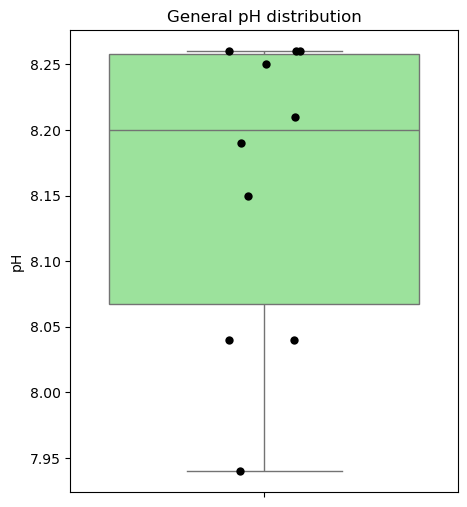

In [112]:
#Check for possible outliers: General boxplot (without separating by site, because I only have one piece of data at each site, so a suitable boxplot could not be constructed)
plt.figure(figsize=(5,6))
sns.boxplot(y=water["pH"], color="lightgreen")
sns.stripplot(y=water["pH"], color="black", size=6, jitter=True)

plt.ylabel("pH")
plt.title("General pH distribution")
plt.show()

In [84]:
#Normality for sediment dataframe
sediment.columns

Index(['Sitio', 'Tipo_sedimento', 'Distancia_m', 'Humedad_%', 'pH', 'CE_uS',
       'Redfield_ratio', 'C_total_mg_g', 'N_total_mg_g', 'P_total_mg_g'],
      dtype='object')

In [85]:

# Select only the numeric columns you want to test
variables_sed = ["Humedad_%", "pH", "CE_uS", "Redfield_ratio",
    "C_total_mg_g", "N_total_mg_g", "P_total_mg_g"
]

# Dictionary to save results
results_sed = {}

# Loop over each variable
for var in variables_sed:
    stat, p = shapiro(sediment[var])
    results_sed[var] = {"W-statistic": stat, "p-value": p} 
    
    print(f"Variable: {var}")
    print(f"  Estadístico= {stat:.5f}, p-valor= {p:.5f}")
    
    if p > 0.05:
        print("  ✅ The distribution is normal (H0 is not rejected)\n")
    else:
        print("  ❌The distribution is NOT normal (H0 is rejected)\n")

Variable: Humedad_%
  Estadístico= 0.93043, p-valor= 0.15739
  ✅ The distribution is normal (H0 is not rejected)

Variable: pH
  Estadístico= 0.94696, p-valor= 0.32330
  ✅ The distribution is normal (H0 is not rejected)

Variable: CE_uS
  Estadístico= 0.91024, p-valor= 0.06441
  ✅ The distribution is normal (H0 is not rejected)

Variable: Redfield_ratio
  Estadístico= 0.91064, p-valor= 0.06555
  ✅ The distribution is normal (H0 is not rejected)

Variable: C_total_mg_g
  Estadístico= 0.94699, p-valor= 0.32370
  ✅ The distribution is normal (H0 is not rejected)

Variable: N_total_mg_g
  Estadístico= 0.98026, p-valor= 0.93735
  ✅ The distribution is normal (H0 is not rejected)

Variable: P_total_mg_g
  Estadístico= 0.92444, p-valor= 0.12068
  ✅ The distribution is normal (H0 is not rejected)



Note: All sediment results are normal, so parametric analyses can be performed.

In [86]:
environment.columns

Index(['Sitio', 'Profundidad_m', 'Temp_potencial_C', 'Salinidad_PSU',
       'Velocidad_corriente_ms', 'Direccion_corriente_deg',
       'Clorofila_a_mg_m3', 'Nitrato_mmol_m3', 'Oxigeno_mmol_m3',
       'Fosfato_mmol_m3', 'Silicato_mmol_m3', 'Temp_atmosferica_C',
       'Humedad_relativa_%', 'Viento_ms', 'Precipitacion_mm', 'Presion_hPa',
       'Radiacion_Wm2'],
      dtype='object')

In [113]:
#Normality for environment dataframe
# List of numeric columns to test
variables_env = [
    "Profundidad_m", "Temp_potencial_C", "Salinidad_PSU",
    "Velocidad_corriente_ms", "Direccion_corriente_deg",
    "Clorofila_a_mg_m3", "Nitrato_mmol_m3", "Oxigeno_mmol_m3",
    "Fosfato_mmol_m3", "Silicato_mmol_m3", "Temp_atmosferica_C",
    "Humedad_relativa_%", "Viento_ms", "Precipitacion_mm",
    "Presion_hPa", "Radiacion_Wm2"
]

# Dictionary to save results
results_env = {}

# Loop over each variable
for var in variables_env:
    stat, p = shapiro(environment[var])
    results_env[var] = {"W-statistic": stat, "p-value": p}
    
    print(f"Variable: {var}")
    print(f"  Estadístico = {stat:.5f}, p-valor = {p:.5f}")
    
    if p > 0.05:
        print("  ✅ Normal distribution (H0 is not rejected)\n")
    else:
        print("  ❌ Non-normal distribution (H0 is rejected)\n")



Variable: Profundidad_m
  Estadístico = 0.96937, p-valor = 0.88498
  ✅ Normal distribution (H0 is not rejected)

Variable: Temp_potencial_C
  Estadístico = 0.83843, p-valor = 0.04226
  ❌ Non-normal distribution (H0 is rejected)

Variable: Salinidad_PSU
  Estadístico = 0.87683, p-valor = 0.11998
  ✅ Normal distribution (H0 is not rejected)

Variable: Velocidad_corriente_ms
  Estadístico = 0.96374, p-valor = 0.82749
  ✅ Normal distribution (H0 is not rejected)

Variable: Direccion_corriente_deg
  Estadístico = 0.94858, p-valor = 0.65176
  ✅ Normal distribution (H0 is not rejected)

Variable: Clorofila_a_mg_m3
  Estadístico = 0.73116, p-valor = 0.00210
  ❌ Non-normal distribution (H0 is rejected)

Variable: Nitrato_mmol_m3
  Estadístico = 0.95616, p-valor = 0.74138
  ✅ Normal distribution (H0 is not rejected)

Variable: Oxigeno_mmol_m3
  Estadístico = 0.97082, p-valor = 0.89833
  ✅ Normal distribution (H0 is not rejected)

Variable: Fosfato_mmol_m3
  Estadístico = 0.89279, p-valor = 0.182

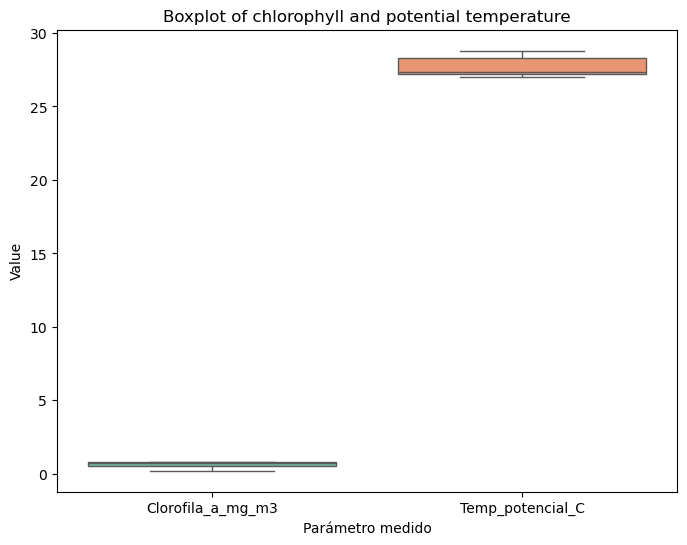

In [127]:
# Convert to long format
env_noparametric = environment.melt(value_vars=['Clorofila_a_mg_m3', 'Temp_potencial_C'],
                           var_name='Variable', value_name='Valor')

# Boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x='Variable', y='Valor', hue="Variable", data=env_noparametric, palette='Set2', legend=False)
plt.title('Boxplot of chlorophyll and potential temperature')
plt.ylabel('Value')
plt.xlabel('Parámetro medido')
plt.show()


NOTE: Normality Tests

Water: All variables followed a normal distribution except pH (Shapiro-Wilk, p = 0.046), so nonparametric tests were used for pH.

The pH may be nonnormal because: I have few sites (n = 10), which increases the sensitivity of the test, and/or there is an outlier that breaks normality. After examining the possible presence of outliers through a boxplot, the nonnormality is most likely due to my low n.

Sediment: All are normal.

Environment: All variables are normal, except Chlorophyll_a_mg_m3 and Potential_Temp_C

#### Water data

In [89]:
water.columns

Index(['Sitio', 'Distancia_m', 'Muestra', 'P_total_mg_L', 'N_total_mg_L',
       'C_total_mg_L', 'DQO_mg_L', 'Solidos_totales_mg_L', 'pH'],
      dtype='object')

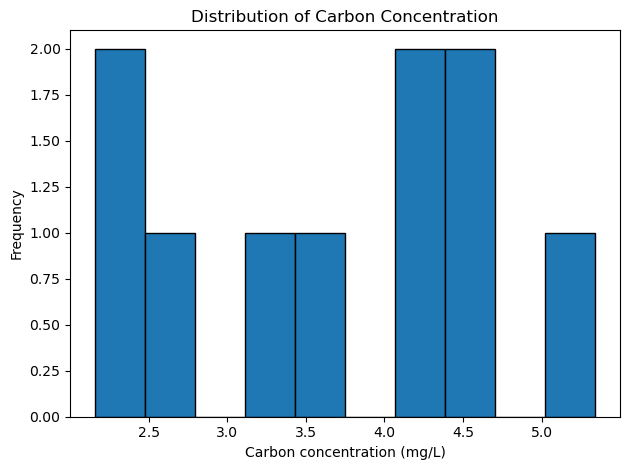

In [90]:
# Histogram 
water_C = water["C_total_mg_L"]

plt.hist(water_C, bins=10, edgecolor="black")
plt.xlabel("Carbon concentration (mg/L)")
plt.ylabel("Frequency")
plt.title("Distribution of Carbon Concentration")
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

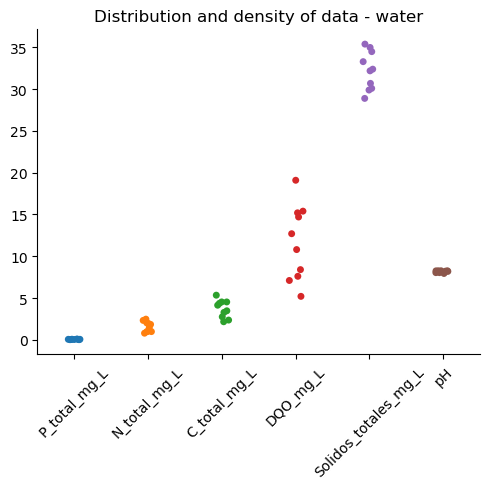

In [91]:
#Violin plot 
plt.figure(figsize=(12,6))
sns.catplot(data=water.drop(columns=["Sitio","Distancia_m","Muestra"]))
plt.title("Distribution and density of data - water")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

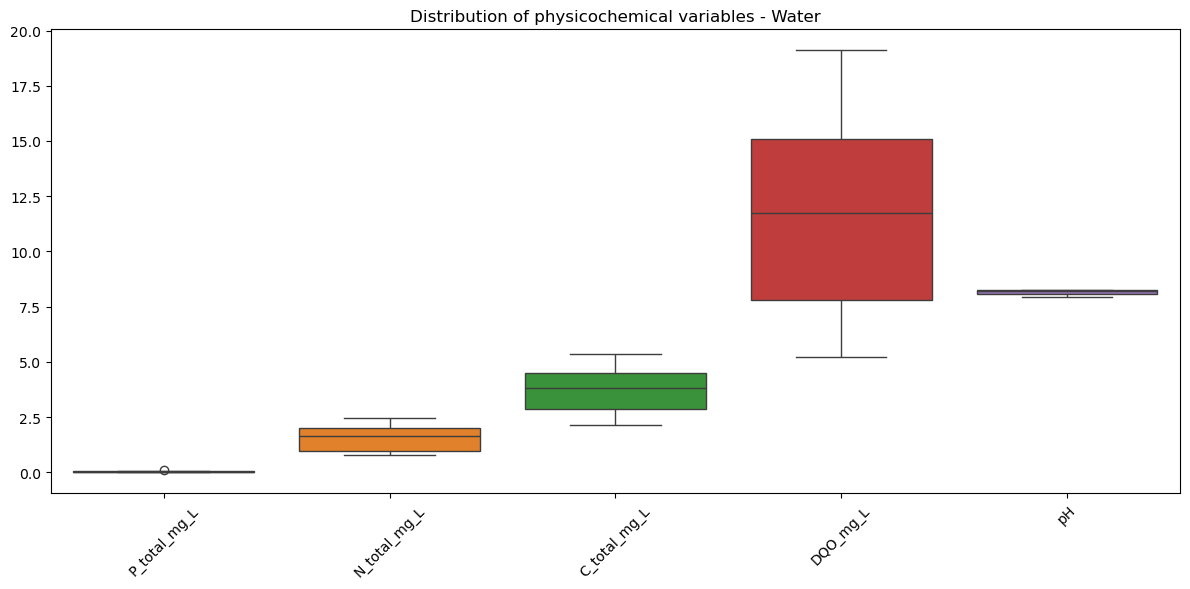

In [92]:
#Boxplot to view range and outliers: Quickly observe variability and possible extreme values
plt.figure(figsize=(12,6))
sns.boxplot(data=water.drop(columns=["Sitio","Distancia_m","Muestra","Solidos_totales_mg_L"])) #.drop() en pandas se usa paraeliminar columnas o filas de un DataFrame (no contienen datos numéricos útiles para el boxplot)
plt.title("Distribution of physicochemical variables - Water")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

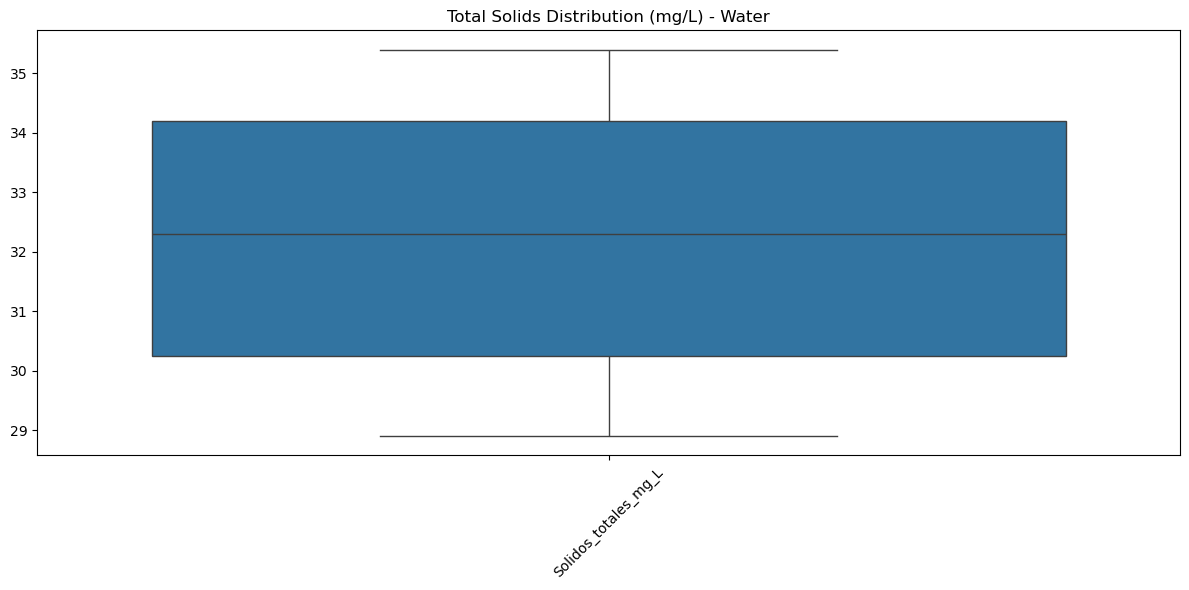

In [96]:

plt.figure(figsize=(12,6))
sns.boxplot(data=water[["Solidos_totales_mg_L"]]) 
plt.title("Total Solids Distribution (mg/L) - Water")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Sediment data

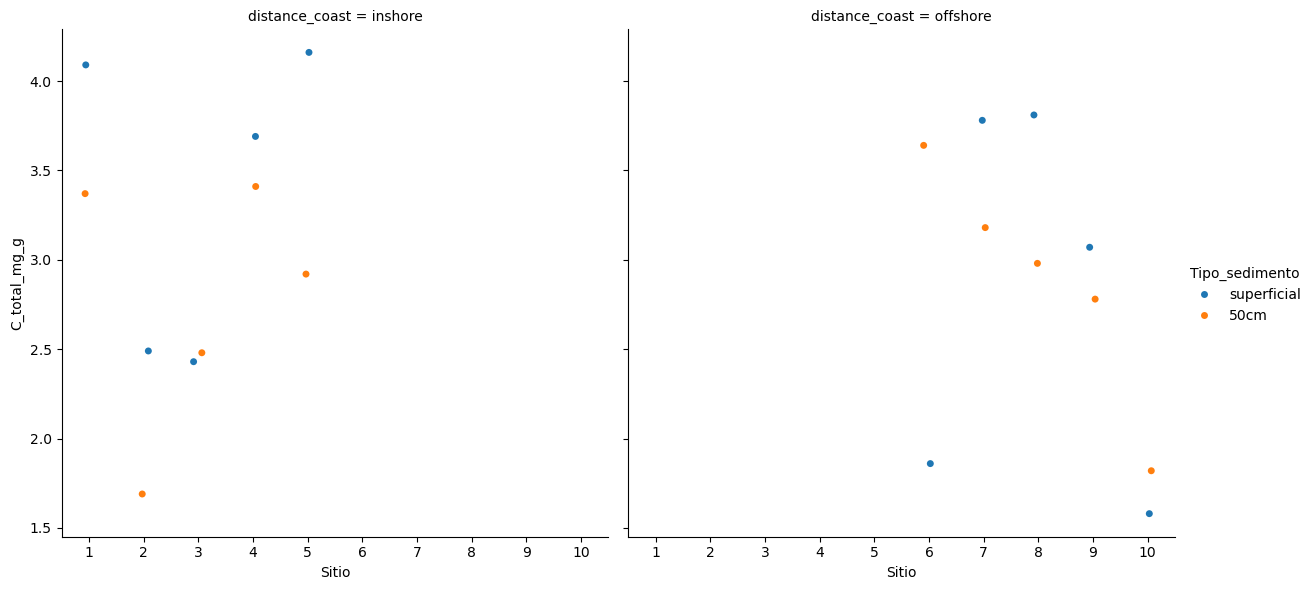

In [132]:
# Create a new column named "distance_coast" to define sites considering as: inshore and offshore
# if Sitios 1-5 are inshore, 6-10 offshore
sediment["distance_coast"] = sediment["Sitio"].apply(lambda x: "inshore" if x <= 5 else "offshore")


sns.catplot(
    data=sediment,
    x="Sitio", y="C_total_mg_g",
    hue="Tipo_sedimento",
    col="distance_coast", 
    kind="strip",
    height=6, aspect=1
)

plt.show()

Overall, the variation in C is high and there does not appear to be a pattern that shows a significant relationship.

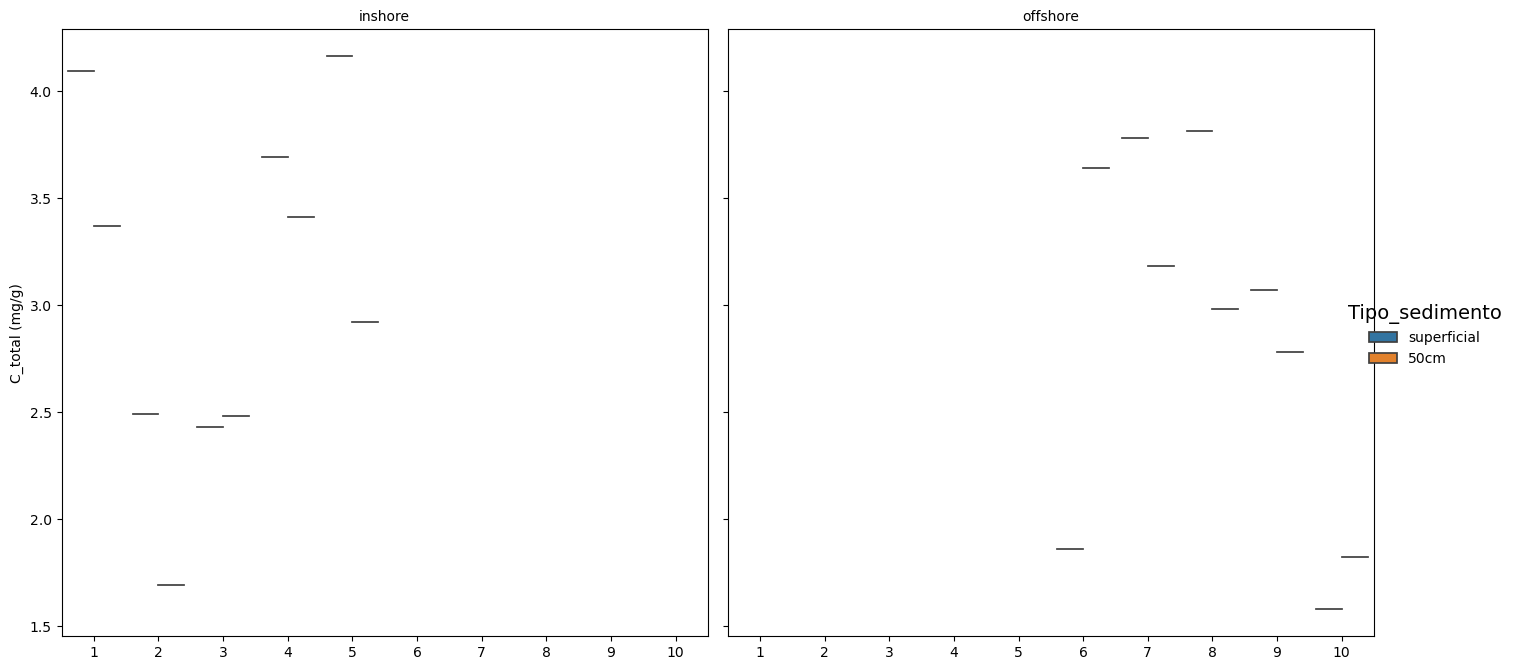

In [133]:
#plot a violin plot with Catplot in Seaborn

# We create a categorical variable "distance_coast"
ax = sns.catplot(
    data=sediment,
    x="Sitio", y="C_total_mg_g",
    hue="Tipo_sedimento", col="distance_coast",
    kind="violin",
    height=7, aspect=1
)

# Edit chart
ax.set(xlabel='', ylabel='C_total (mg/g)')
ax.set_titles(col_template="{col_name}", row_template="{row_name}")
plt.setp(ax._legend.get_title(), fontsize=14)
sns.despine(top=False, right=False)

plt.show()

With my current data (one value per combination), Seaborn only draws lines.

Violin plots aren't the best fit for my data, as they require multiple observations per group to estimate density. Therefore, the plot only shows a line instead of a violin shape.

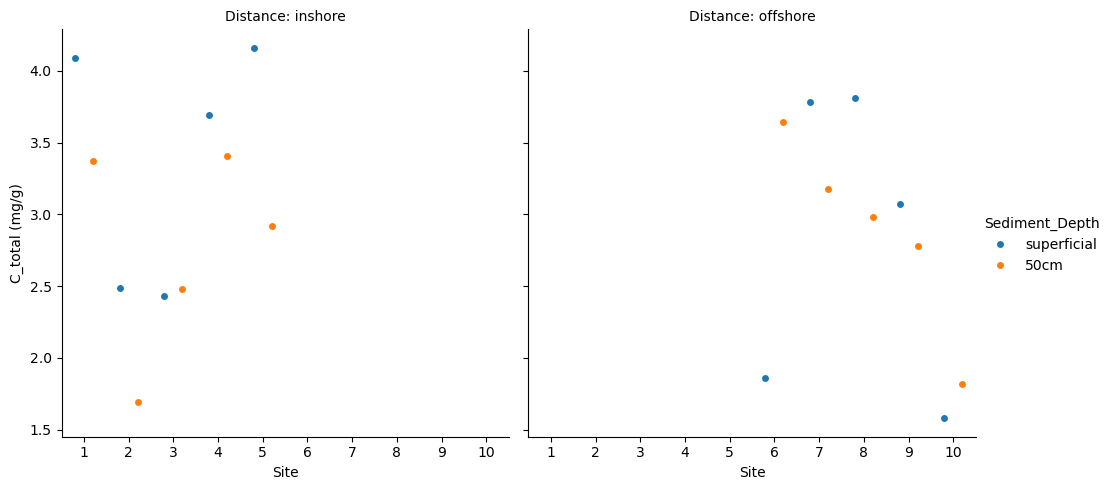

In [134]:
#Define color palette
palette = {"superficial": "#1f77b4", "50cm": "#ff7f0e"}  

# Stripplot with facets (col="distance_coast") and colors by sediment type
ax = sns.catplot(
    data=sediment,
    x="Sitio", y="C_total_mg_g",
    hue="Tipo_sedimento", col="distance_coast",
    kind="strip",
    dodge=True,       # separates points from the same place
    jitter=True,      # slightly disperse the points to avoid overlapping
    height=5, aspect=1,
    palette=palette
)

#Improve legend and titles
ax.set_axis_labels("Site", "C_total (mg/g)")
ax.set_titles(col_template="Distance: {col_name}")
ax._legend.set_title("Sediment_Depth")




*Eje X (Sitio)*: sitios de estudio

*Eje Y (C_total mg/g)*: valores de carbono total

*Hue (Tipo_sedimento)*: colores para superficial y 50 cm.

*Facetas (col="zona")*: definir dos paneles: inshore y offshore.

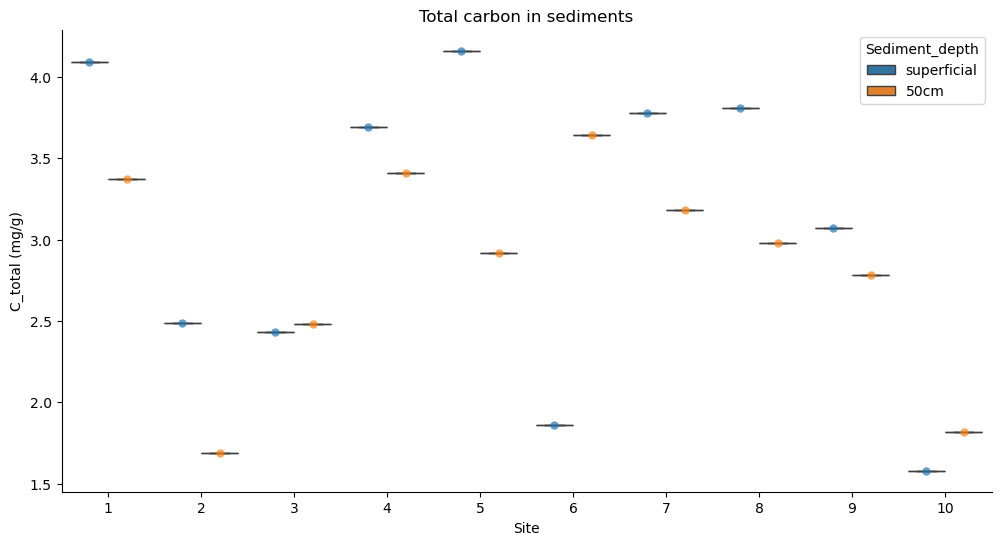

In [135]:
#Boxplot + stripplot
plt.figure(figsize=(12,6))

# Boxplot para ver la tendencia y dispersión
sns.boxplot(
    data=sediment,
    x="Sitio", y="C_total_mg_g",
    hue="Tipo_sedimento",
    showcaps=True, 
    boxprops={'facecolor':'None'}, # cajas transparentes
    showfliers=False,
    whiskerprops={'linewidth':0},
)

# Stripplot para ver los puntos reales
sns.stripplot(
    data=sediment,
    x="Sitio", y="C_total_mg_g",
    hue="Tipo_sedimento",
    dodge=True, 
    alpha=0.7, size=6
)

plt.ylabel("C_total (mg/g)")
plt.xlabel("Site")
plt.title("Total carbon in sediments")

# Ajustar leyenda (se repite por box+strip)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[0:2], labels[0:2], title="Sediment_depth")

sns.despine()
plt.show()

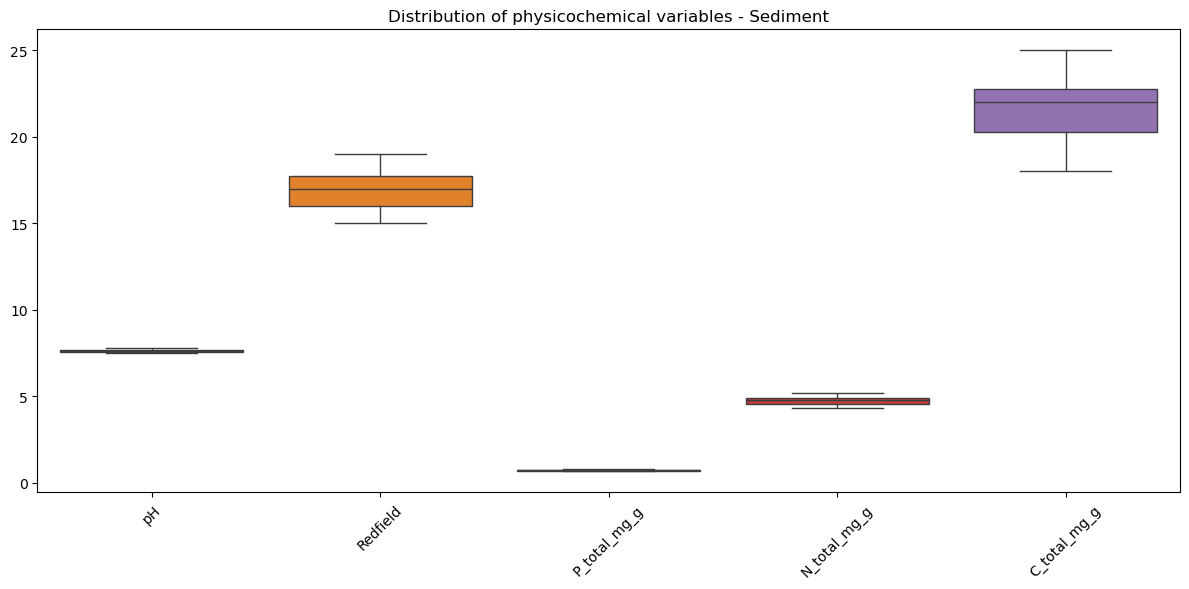

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=sediment.drop(columns=["Sitio","Distancia_m","Tipo_sedimento","Conductividad_uS","Humedad_%"]))
plt.title("Distribution of physicochemical variables - Sediment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [140]:
sediment.columns

Index(['Sitio', 'Tipo_sedimento', 'Distancia_m', 'Humedad_%', 'pH', 'CE_uS',
       'Redfield_ratio', 'C_total_mg_g', 'N_total_mg_g', 'P_total_mg_g',
       'distance_coast'],
      dtype='object')

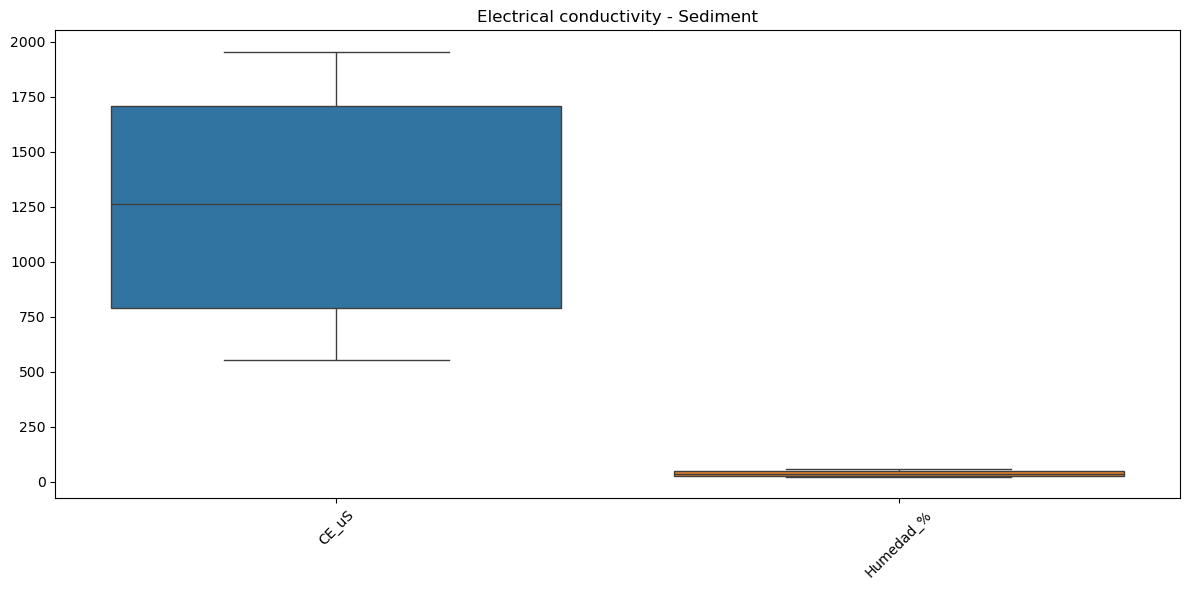

In [141]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=sediment[["CE_uS", "Humedad_%"]])
plt.title("Electrical conductivity - Sediment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

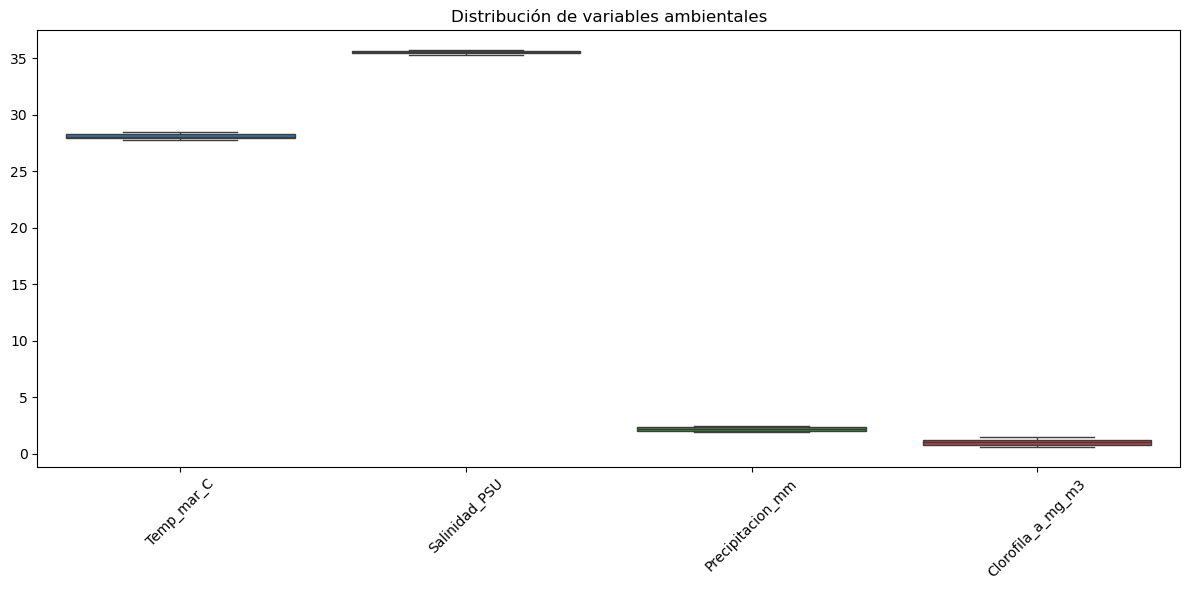

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=environment.drop(columns=["Fecha","Sitio","Distancia_m", "PAR_mmol_m2_s"]))
plt.title("Distribution of environmental variables")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Association between physicochemical and environmental variables 

In [ ]:
sediment

,Sitio,Tipo_sedimento,Distancia_m,Humedad_%,pH,CE_uS,Redfield_ratio,C_total_mg_g,N_total_mg_g,P_total_mg_g
0,1,superficial,0,35.0,7.99,683.1,15.1,4.09,0.58,0.041
1,1,50cm,0,58.0,7.61,1242.8,14.2,3.37,0.38,0.026
2,2,superficial,10,49.3,7.73,551.6,18.6,2.49,0.31,0.027
3,2,50cm,10,43.9,7.79,1864.0,14.9,1.69,0.20,0.019
4,3,superficial,20,26.2,7.86,888.2,14.2,2.43,0.25,0.022
5,3,50cm,20,26.2,8.13,1493.8,16.3,2.48,0.32,0.026
6,4,superficial,30,22.3,7.66,967.6,13.1,3.69,0.45,0.032
7,4,50cm,30,54.6,7.91,1280.1,18.4,3.41,0.37,0.026
8,5,superficial,40,44.0,7.97,1320.1,12.6,4.16,0.54,0.054
9,5,50cm,40,48.3,7.54,777.3,19.9,2.92,0.40,0.032


In [ ]:
sediment.columns

Index(['Sitio', 'Tipo_sedimento', 'Humedad_%', 'pH', 'CE_uS', 'Redfield_ratio',
       'C_total_mg_g', 'N_total_mg_g', 'P_total_mg_g', 'distance_coast'],
      dtype='object')

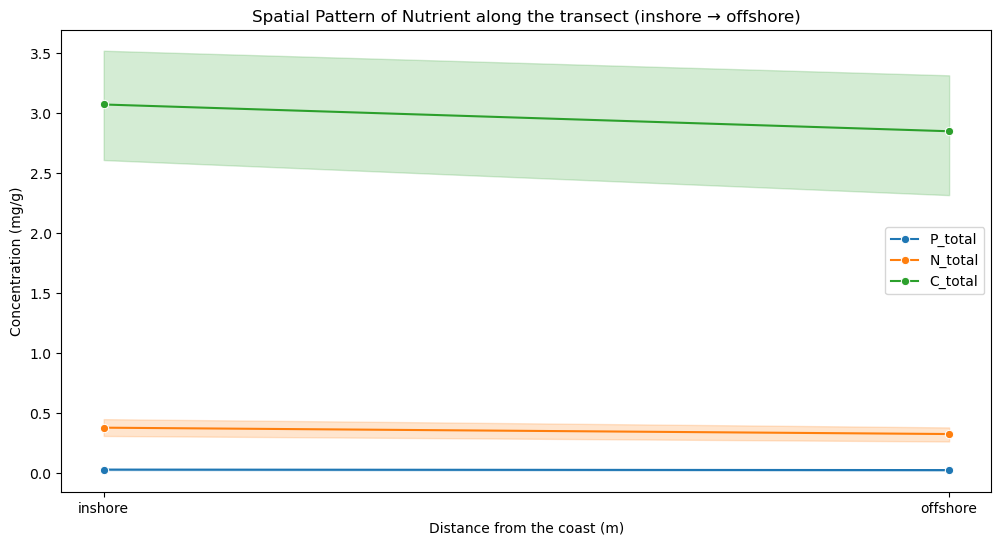

In [ ]:
### Sediment
plt.figure(figsize=(12,6))
sns.lineplot(data=sediment, x="distance_coast", y="P_total_mg_g", marker="o", label="P_total")
sns.lineplot(data=sediment, x="distance_coast", y="N_total_mg_g", marker="o", label="N_total")
sns.lineplot(data=sediment, x="distance_coast", y="C_total_mg_g", marker="o", label="C_total")
plt.title("Spatial Pattern of Nutrient along the transect (inshore → offshore)")
plt.xlabel("Distance from the coast (m)")
plt.ylabel("Concentration (mg/g)")
plt.legend()
plt.show()

The "Spatial Pattern of Nutrient along the transect (inshore → offshore)" graph shows a spatial pattern, with decreasing nutrients as distance from the coast increases.

In [ ]:
sediment.columns

Index(['Sitio', 'Tipo_sedimento', 'Distancia_m', 'Humedad_%', 'pH', 'CE_uS',
       'Redfield_ratio', 'C_total_mg_g', 'N_total_mg_g', 'P_total_mg_g',
       'distance_coast'],
      dtype='object')

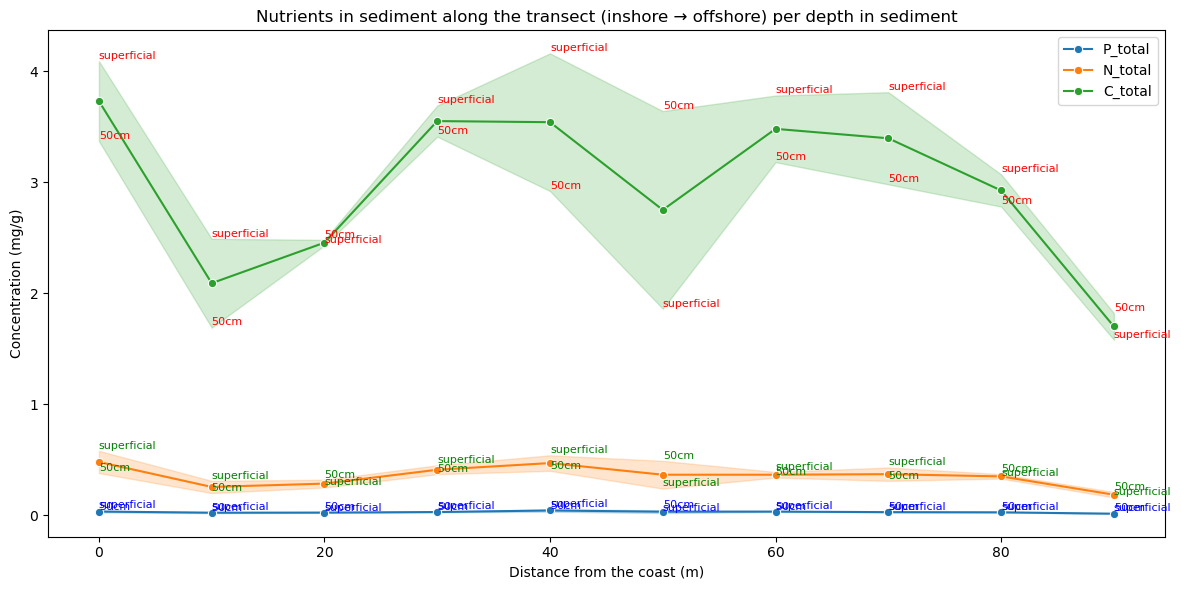

In [ ]:
### Sediment
plt.figure(figsize=(12, 6))

# Plot each line
sns.lineplot(data=sediment, x="Distancia_m", y="P_total_mg_g", marker="o", label="P_total")
sns.lineplot(data=sediment, x="Distancia_m", y="N_total_mg_g", marker="o", label="N_total")
sns.lineplot(data=sediment, x="Distancia_m", y="C_total_mg_g", marker="o", label="C_total")

# Label each point with the sediment type
for i in range(len(sediment)):
    tipo = sediment["Tipo_sedimento"].iloc[i]  # Column with labels of depth in sediment
    x = sediment["Distancia_m"].iloc[i]
    y_P = sediment["P_total_mg_g"].iloc[i]
    y_N = sediment["N_total_mg_g"].iloc[i]
    y_C = sediment["C_total_mg_g"].iloc[i]

    plt.text(x, y_P + 0.02, tipo, fontsize=8, color="blue")
    plt.text(x, y_N + 0.02, tipo, fontsize=8, color="green")
    plt.text(x, y_C + 0.02, tipo, fontsize=8, color="red")

plt.title("Nutrients in sediment along the transect (inshore → offshore) per depth in sediment")
plt.xlabel("Distance from the coast (m)")
plt.ylabel("Concentration (mg/g)")
plt.legend()
plt.tight_layout()
plt.show()



The "Spatial Pattern of Nutrient along the transect (inshore → offshore) per depth in sediment" graph shows a different spatial pattern; the trend of decreasing nutrients with increasing distance from the coast is not as clear.

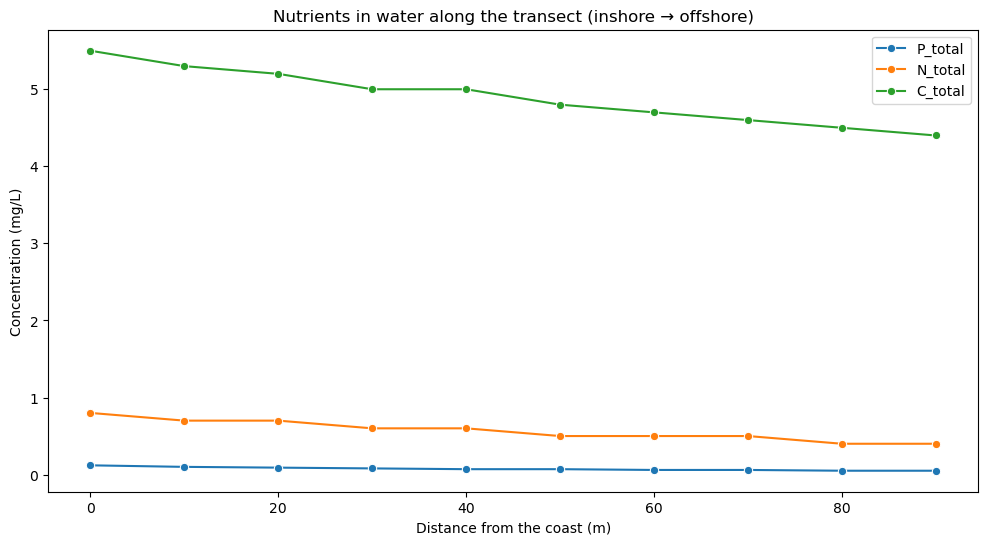

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=water, x="Distancia_m", y="P_total_mgL", marker="o", label="P_total")
sns.lineplot(data=water, x="Distancia_m", y="N_total_mgL", marker="o", label="N_total")
sns.lineplot(data=water, x="Distancia_m", y="C_total_mgL", marker="o", label="C_total")
plt.title("Nutrients in water along the transect (inshore → offshore)")
plt.xlabel("Distance from the coast (m)")
plt.ylabel("Concentration (mg/L)")
plt.legend()
plt.show()

The graph "Nutrients in water along the transect (inshore → offshore)" shows that nutrients such as carbon, nitrogen, and phosphorus decrease with increasing distance from the coast.

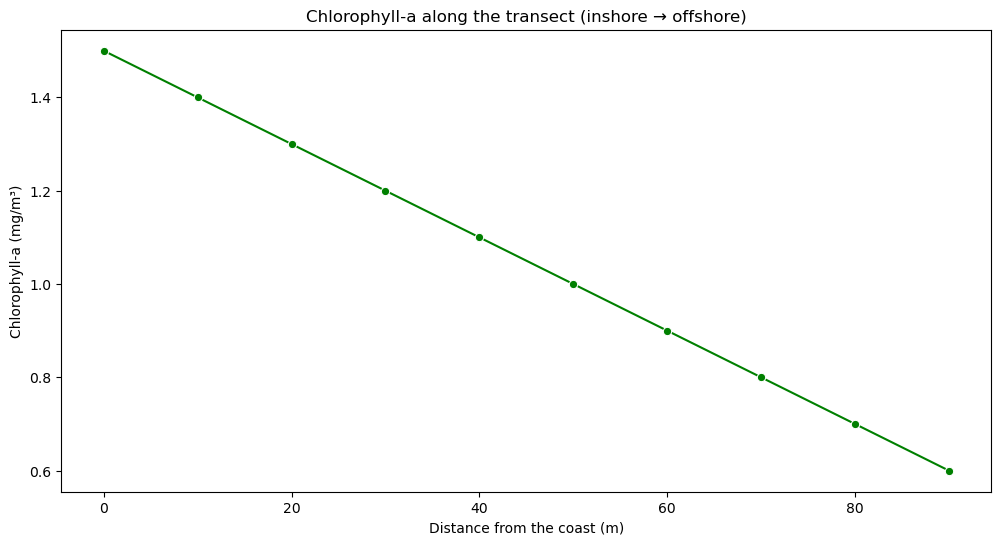

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=environment, x="Distancia_m", y="Clorofila_a_mg_m3", marker="o", color="green")
plt.title("Chlorophyll-a along the transect (inshore → offshore)")
plt.xlabel("Distance from the coast (m)")
plt.ylabel("Chlorophyll-a (mg/m³)")
plt.show()

The graph "Chlorophyll-a along the transect (inshore → offshore)" shows that Chlorophyll-a, similar to nutrients, decrease with increasing distance from the coast.

#### Correlation 

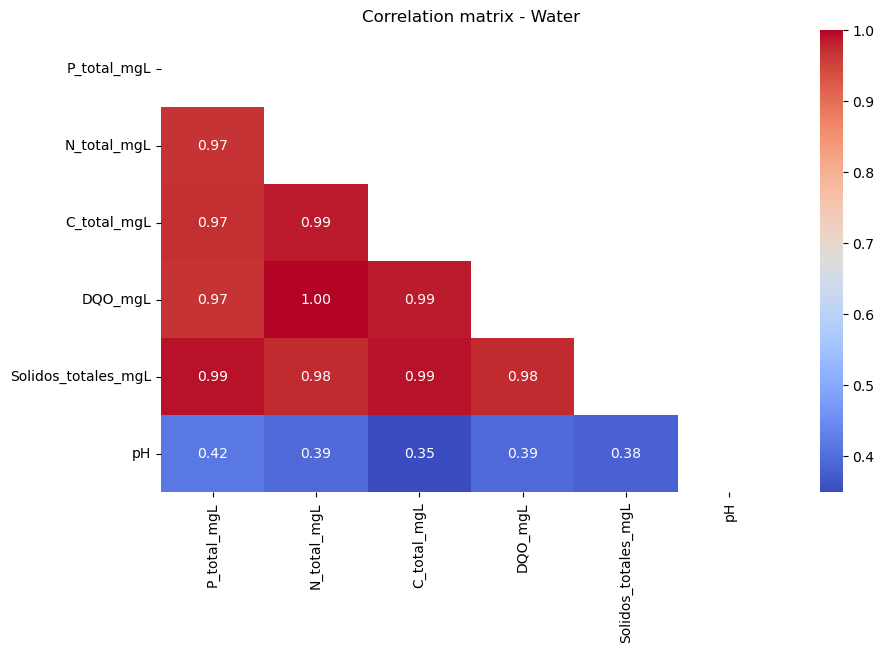

In [ ]:
#Estimation of the correlation matrix
corr_water = water.drop(columns=["Sitio","Distancia_m","Muestra"]).corr()

#Create a mask for the top half of the heat map
mask = np.triu(np.ones_like(corr_water, dtype=bool))

#Heatmap visualization
plt.figure(figsize=(10,6))
sns.heatmap(corr_water, mask=mask, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix - Water")
plt.show()

This heatmap "Correlation matrix - Water" shows that these physicochemical variables are highly related with each other, with the exception of pH.

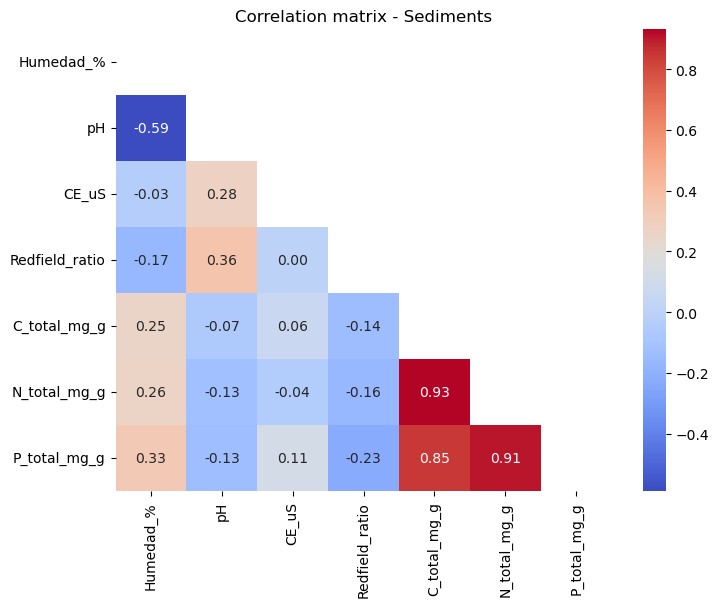

In [ ]:
corr_sed = sediment.drop(columns=["Sitio","Distancia_m","Tipo_sedimento"]).corr()

mask = np.triu(np.ones_like(corr_sed, dtype=bool))

plt.figure(figsize=(8,6))
sns.heatmap(corr_sed, mask=mask, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix - Sediments")
plt.show()

The heatmap "Correlation matrix - Sediments" shows that it has a strong positive correlation between N-C-P and %humidity. However, also is detected a negative correlation between Redfield-Conductividad and pH. 

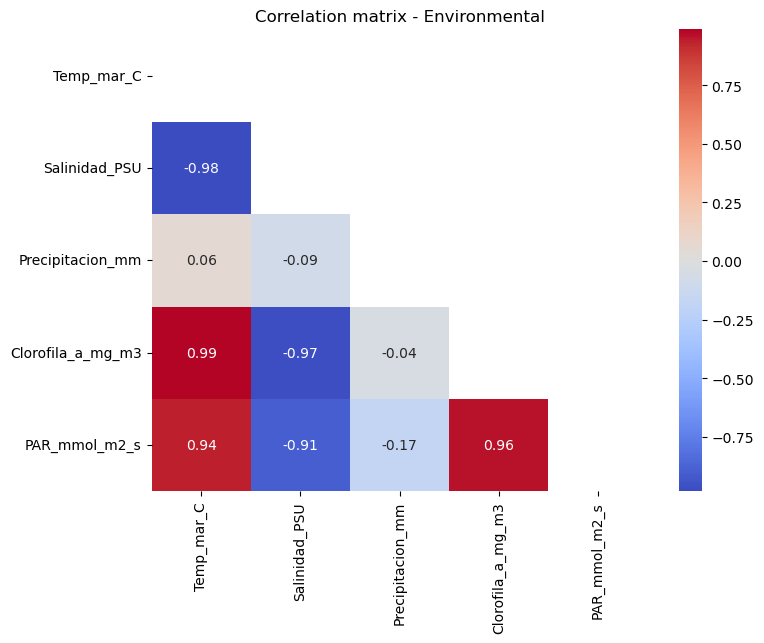

In [ ]:
corr_env = environment.drop(columns=["Fecha","Sitio","Distancia_m"]).corr()

mask = np.triu(np.ones_like(corr_env, dtype=bool))

plt.figure(figsize=(8,6))
sns.heatmap(corr_env, mask=mask, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix - Environmental")
plt.show()

The "Correlation Matrix - Environment" heatmap shows a strong positive correlation between chlorophyll-a and PAR. However, a negative correlation is also detected between salinity and temperature and chlorophyll-a.

#### Multivariate analysis


<Figure size 1500x1000 with 0 Axes>

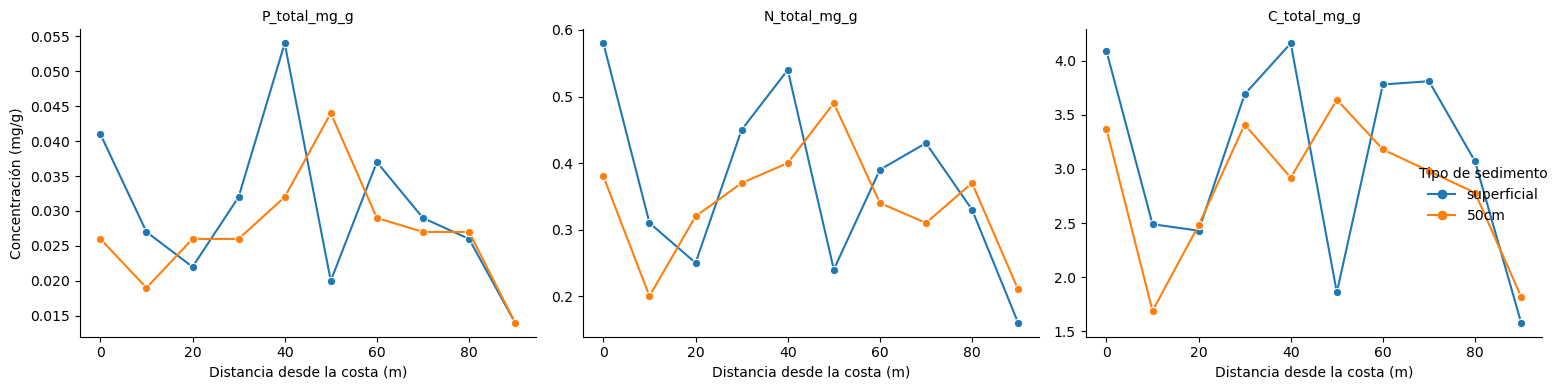

In [ ]:
#Visualize trends by depth in the sediment, along the transect, and for various nutrients
plt.figure(figsize=(15, 10))

# Rearrange to have 'Nutrient' and 'Concentration' columns
sediment_long = sediment.melt(
    id_vars=["Distancia_m", "Tipo_sedimento", "Sitio"],
    value_vars=["P_total_mg_g", "N_total_mg_g", "C_total_mg_g"],
    var_name="Nutriente",
    value_name="Concentración"
)


# Line chart by nutrient, separated by sediment type
g = sns.relplot(
    data=sediment_long,
    x="Distancia_m", y="Concentración",
    hue="Tipo_sedimento", col="Nutriente",
    kind="line", marker="o", facet_kws={"sharey": False},
    height=4, aspect=1.2
)

g.set_titles("{col_name}")
g.set_axis_labels("Distance from the coast (m)", "Concentration (mg/g)")
g._legend.set_title("depth in sediment")
plt.tight_layout()
plt.show()


In [ ]:
# Linear regression by nutrient
## This indicates whether distance and/or depth have significant effects on concentration.

import statsmodels.formula.api as smf

# Example for P_total
modelo = smf.ols("P_total_mg_g ~ Distancia_m + Tipo_sedimento", data=sediment).fit()
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:           P_total_mg_g   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                    0.7928
Date:              dom., 07 sep. 2025   Prob (F-statistic):              0.469
Time:                        23:54:37   Log-Likelihood:                 65.665
No. Observations:                  20   AIC:                            -125.3
Df Residuals:                      17   BIC:                            -122.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [ ]:
#TWO-WAY ANOVA
## To assess whether there are significant differences by nutrient and depth
## This shows you if there are significant interactions between sediment depth and nutrient.
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Transform to long format
sediment_long = sediment.melt(
    id_vars=["Distancia_m", "Tipo_sedimento"],
    value_vars=["P_total_mg_g", "N_total_mg_g", "C_total_mg_g"],
    var_name="Nutriente", value_name="Concentración"
)

#TWO-WAY ANOVA
modelo_anova = ols("Concentración ~ C(Tipo_sedimento) + C(Nutriente) + C(Tipo_sedimento):C(Nutriente)", data=sediment_long).fit()
anova_table = sm.stats.anova_lm(modelo_anova, typ=2)
print(anova_table)

# Parameters for the post-hoc
alpha = 0.05
df = sediment_long.copy()
factor1 = "Tipo_sedimento"
factor2 = "Nutriente"
response = "Concentración"

# Tukey HSD if there are significant effects
if (anova_table['PR(>F)'] < alpha).any():
    print("\nSignificant effects detected. Running Tukey HSD post-hoc test:")
    df['Group'] = df[factor1].astype(str) + " - " + df[factor2].astype(str)
    tukey = pairwise_tukeyhsd(df[response], df['Group'], alpha=alpha)
    print(tukey.summary())
else:
    print("\nNo significant effects detected. Post-hoc test is not required.")

                                    sum_sq    df           F        PR(>F)
C(Tipo_sedimento)                 0.151202   1.0    0.669100  4.169604e-01
C(Nutriente)                    103.394176   2.0  228.769742  4.314139e-27
C(Tipo_sedimento):C(Nutriente)    0.214859   2.0    0.475396  6.242156e-01
Residual                         12.202850  54.0         NaN           NaN

Significant effects detected. Running Tukey HSD post-hoc test:
                    Multiple Comparison of Means - Tukey HSD, FWER=0.05                     
          group1                     group2           meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------------------
       50cm - C_total_mg_g        50cm - N_total_mg_g   -2.488    0.0 -3.1161 -1.8599   True
       50cm - C_total_mg_g        50cm - P_total_mg_g     -2.8    0.0 -3.4281 -2.1719   True
       50cm - C_total_mg_g superficial - C_total_mg_g    0.269 0.8022 -0.3591  0.8971  False
   

The PR(>F) column tells you if there are significant differences between depths.

If p < 0.05, depth affects nutrient concentration.

#### PCA

In [104]:
# PCA (Principal Component Analysis)
# To see if there are clusters by depth or site:

# Select the nutrient columns
X = sediment[["P_total_mg_g", "N_total_mg_g", "C_total_mg_g"]]

# Scale the data
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

# Create a DataFrame with the components
pca_df = pd.DataFrame(components, columns=["PC1", "PC2"])
pca_df["Tipo_sedimento"] = sediment["Tipo_sedimento"].values


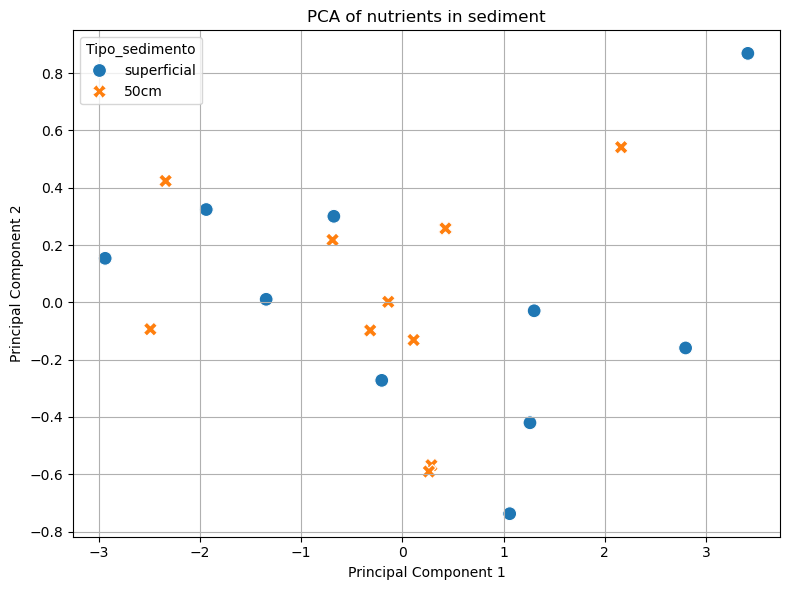

In [105]:
# Chart
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Tipo_sedimento", style="Tipo_sedimento", s=100)
plt.title("PCA of nutrients in sediment")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

Since the PCA shows that the surface and 50cm samples are mixed together, we can infer that the chemical profiles are similar between depths.

In [106]:
#Mostrar varianza explicada
print("Varianza explicada por cada componente:")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.2%}")

Varianza explicada por cada componente:
PC1: 93.02%
PC2: 5.15%


It's a good idea to stick with the first component because it explains virtually all the variance.
This means:

- Effective reduction: you can represent your data in 1D (PC1 only) without losing almost any information.

- High collinearity: your variables are strongly correlated with each other.

- Simplified visualization: you can use PC1 as an ordering or grouping axis.

In [107]:
print(pca.explained_variance_ratio_)

[0.93023379 0.05148177]


- The explained variance in PCA is key to understanding how much of the original information you are preserving by reducing dimensions. Here's a clear and practical explanation.
- When you perform PCA, you are transforming your original variables into principal components (PCs), which are linear combinations of the original variables. Each component captures a portion of the total variability in the data.

PC1 captures the largest possible amount of variance.

PC2 captures the largest remaining variance, and so on.

The explained variance tells you how much information (variability) each component retains.

- For visualization: 80–90% cumulative variance is usually sufficient.

For more demanding analyses (clustering, classification): ideally >90%.

If the first PCs explain little variance, your data may lack clear patterns or be highly dispersed.

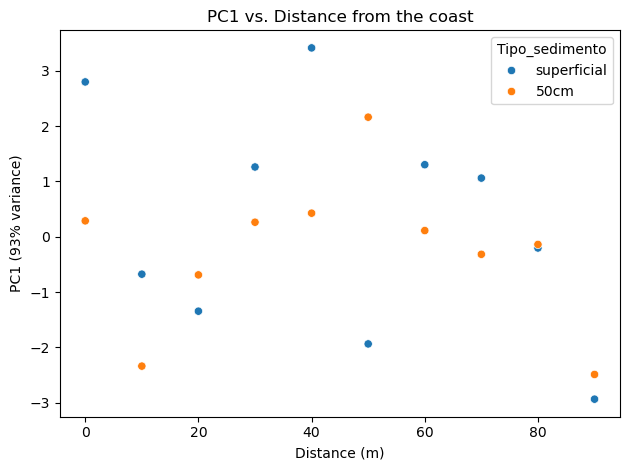

In [108]:
#Graficar PC1 vs. distancia
pca_df["Distancia_m"] = sediment["Distancia_m"]
sns.scatterplot(data=pca_df, x="Distancia_m", y="PC1", hue="Tipo_sedimento")
plt.title("PC1 vs. Distance from the coast")
plt.xlabel("Distance (m)")
plt.ylabel("PC1 (93% variance)")
plt.tight_layout()
plt.show()

General trend: It appears that PC1 values ​​decrease with increasing distance from the coast, especially in sediments within 50 cm. This suggests an environmental gradient: more nutrients or variability near the coast, less as you move further away.

Separation by depth:

The surface points (blue) are more dispersed and tend toward positive PC1 values.

The 50 cm points (orange) are more clustered and tend toward negative values.

This reinforces what you see in the boxplot: more variability at the surface, and more homogeneous conditions at depth.

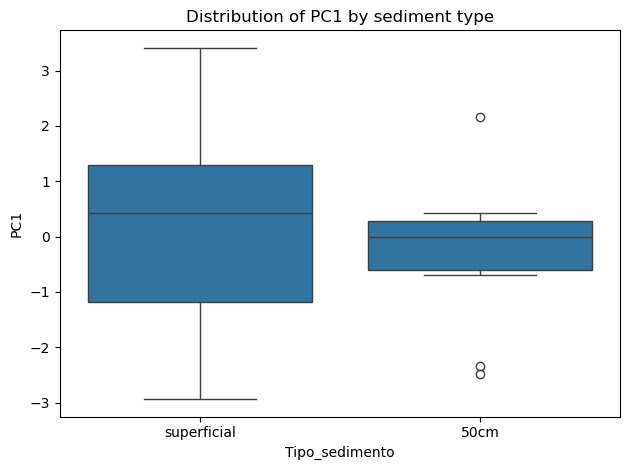

In [109]:
#You can use PC1 as a new variable to compare sites
sns.boxplot(data=pca_df, x="Tipo_sedimento", y="PC1")
plt.title("Distribution of PC1 by sediment type")
plt.tight_layout()
plt.show()


Shallow:

- Greater dispersion in PC1 values.

- Slightly positive median → more nutrients or variability at surface level.

- Possible subgroups or outliers that could reflect differences between sites.

50 cm:

- More compact distribution.

- Negative median → tendency toward lower concentrations or different chemical profiles.

- Less variability → more homogeneous conditions at depth.

In [111]:
#To find out which variables contribute most to PC1:
loadings = pd.Series(pca.components_[0], index=["P_total_mg_g", "N_total_mg_g", "C_total_mg_g"])
print("Cargas de PC1:")
print(loadings.sort_values(ascending=False))


Cargas de PC1:
N_total_mg_g    0.587366
C_total_mg_g    0.575013
P_total_mg_g    0.569528
dtype: float64


*loadings* indicates that PC1 could be interpreted as a gradient of nutrient enrichment, with higher PC1 values ​​reflecting samples with higher P, C, and N levels.

1° Nitrogen (N) has the greatest influence on PC1.

2° Carbon (C) also contributes significantly.

3° Phosphorus (P) has a moderate influence.

#### **Conclusion** 
This project illustrates how integrating water, sediment, and environmental data can uncover important patterns in coastal ecosystems. Normality tests indicated that most variables in sediments and environmental data followed a normal distribution, with exceptions such as pH in water and Chlorophyll-a and potential temperature in the environment, which could be analyzed using non-parametric approaches when necessary.

Exploratory visualizations revealed clear spatial trends. Nutrient concentrations (carbon, nitrogen, and phosphorus) and Chlorophyll-a generally decrease with increasing distance from the coast in both water and sediment. However, depth-specific sediment patterns showed that the decrease in nutrients with distance was less pronounced, indicating some heterogeneity between surface and 50 cm samples. Boxplots and PC1 distributions confirmed that surface sediments exhibited higher variability and slightly higher median nutrient concentrations, while 50 cm samples were more homogeneous and tended toward lower values, suggesting depth-related stabilization of chemical profiles.

Correlation analyses highlighted strong positive associations between nitrogen, carbon, phosphorus, and sediment humidity, while certain physicochemical relationships, such as between pH and Redfield ratio or conductivity, were negative. In the environment, Chlorophyll-a was positively correlated with PAR, whereas salinity and temperature showed negative correlations with Chlorophyll-a, indicating complex interactions among environmental variables.

PCA revealed that PC1 effectively summarizes most of the variability in the dataset, reflecting a nutritional enrichment gradient with nitrogen as the main driver, followed by carbon and phosphorus. Surface samples were more dispersed along PC1, indicating higher heterogeneity, whereas deeper samples clustered more tightly, reinforcing depth-related differences. Overall, the first principal component captured a clear gradient from nutrient-rich coastal sites to less enriched offshore locations, providing a simplified yet informative representation of the spatial and depth-related variability.

In conclusion, Python proved to be a versatile and powerful tool for exploratory data analysis, multivariate statistics, and visualization, allowing the identification of spatial, depth-related, and chemical patterns in coastal ecosystems. These insights can inform further ecological studies and support the sustainable management of coastal environments.


#### **References** 
Gomez, I., Silva, R., Lithgow, D., Rodriguez, J., Banaszak, A. T., & van Tussenbroek, B. (2022). A review of disturbances to the ecosystems of the Mexican Caribbean, their causes and consequences. Journal of Marine Science and Engineering, 10(5), 644.

Guimarais, M., Zúñiga-Ríos, A., Cruz-Ramírez, C. J., Chávez, V., Odériz, I., van Tussenbroek, B. I., & Silva, R. (2021). The conservational state of coastal ecosystems on the mexican caribbean coast: Environmental guidelines for their management. Sustainability, 13(5), 2738.

Pérez-Gómez, J. A., García-Mendoza, E., Olivos-Ortiz, A., Paytan, A., Rebolledo-Vieyra, M., Delgado-Pech, B., & Almazán-Becerril, A. (2020). Indicators of nutrient enrichment in coastal ecosystems of the northern Mexican Caribbean. Ecological Indicators, 118, 106756.